In [260]:
import pandas as pd
import matplotlib.pyplot as plt

In [261]:
df = pd.read_csv('dataset_NBA.csv')

In [262]:
df = (df.groupby(['season', 'Team', 'win_match', 'position'])['overall_pick'].sum()/df.groupby(['season', 'Team', 'win_match', 'position'])['overall_pick'].count()).reset_index(name='total_pick')


In [263]:
Max = 61
Min = 1
df['total_pick'] = df.apply(lambda x: Max + Min - x['total_pick'], axis=1)

In [264]:
# list = 'Phoenix Suns'
list = input("Ville suivi du nom de l'équipe : ")
df = df[df['Team'].isin([list])]

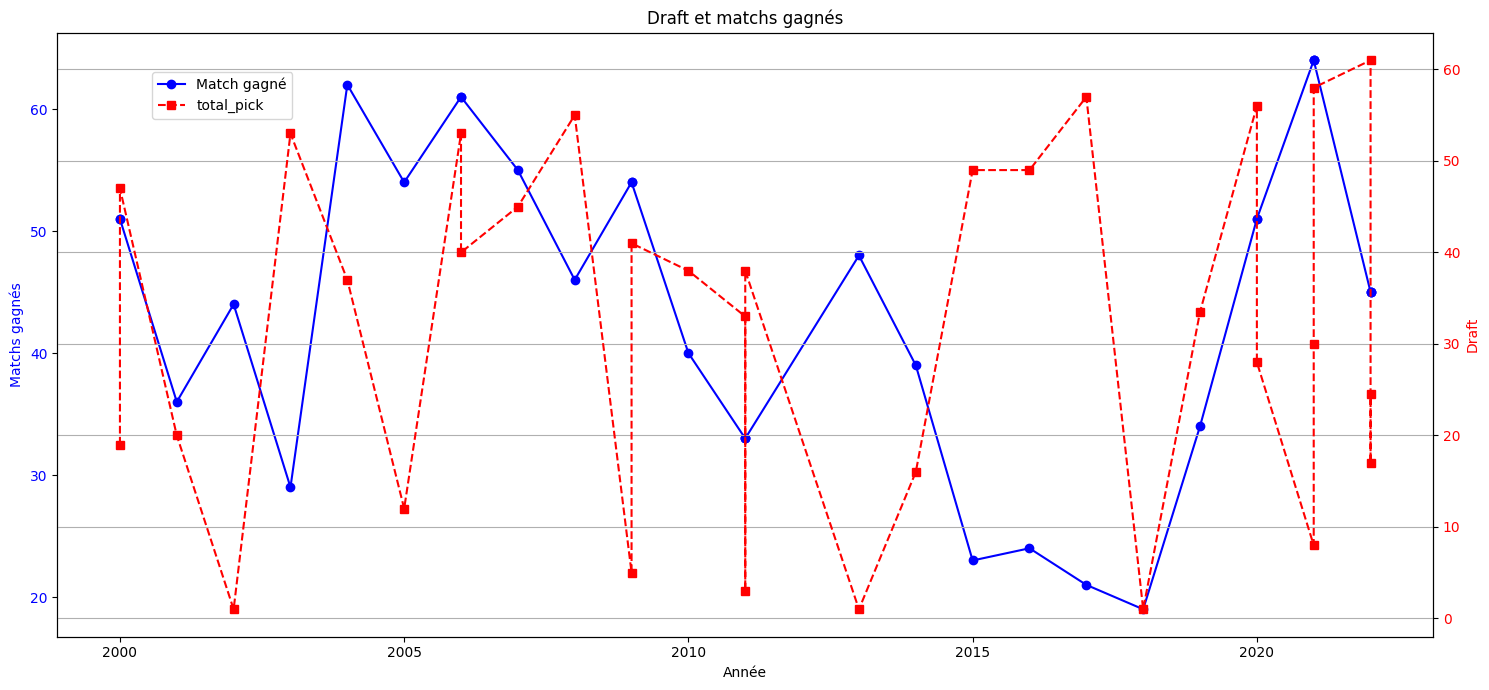

In [265]:
# Créer la figure et les axes
fig, ax1 = plt.subplots(figsize=(15, 7))

# Tracer les ventes avec l'axe y principal
ax1.plot(df['season'], df['win_match'], marker='o', linestyle='-', color='b', label='Match gagné')
ax1.set_xlabel('Année')
ax1.set_ylabel('Matchs gagnés', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Créer un deuxième axe y qui partage le même axe x
ax2 = ax1.twinx()
ax2.plot(df['season'], df['total_pick'], marker='s', linestyle='--', color='r', label='total_pick')
ax2.set_ylabel('Draft', color='r')
ax2.tick_params(axis='y', labelcolor='r')


# for i in range(len(df_draft_Wizards['season'])):
#     plt.text(df_draft_Wizards['season'][i], df_draft_Wizards['overall_pick'][i], df_draft_Wizards['position'][i], fontsize=10, ha='center', va='bottom')

# Ajouter des titres et des labels
plt.title('Draft et matchs gagnés')

# Afficher une légende
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(True)
# Afficher le graphique
plt.show()

In [266]:
def category(valeur):
    if valeur == "nan":
        pass
    elif valeur <= 10:
        return 'A'
    elif valeur <= 20:
        return "B"
    elif valeur <= 30:
        return "C"
    elif valeur <= 40:
        return "D"
    elif valeur <= 50:
        return "E"
    elif valeur <= 60:
        return "F"
    elif valeur <= 70:
        return "G"
    elif valeur <= 80:
        return "H"
    else:
        return "I"
    
df['win_match'] = df['win_match'].apply(category)

In [267]:
df.to_csv(list+'.csv')